In [1]:
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img_to_tensor = transforms.ToTensor()
tensor_to_img = transforms.ToPILImage()
center_crop = transforms.CenterCrop(512)

In [3]:
img2 = Image.open(r"C:\Users\User\Documents\Works\PAIL\Generative-Test\Data\00002.png")
tensor2 = img_to_tensor(img2)
img2

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Documents\\Works\\PAIL\\Generative-Test\\Data\\00002.png'

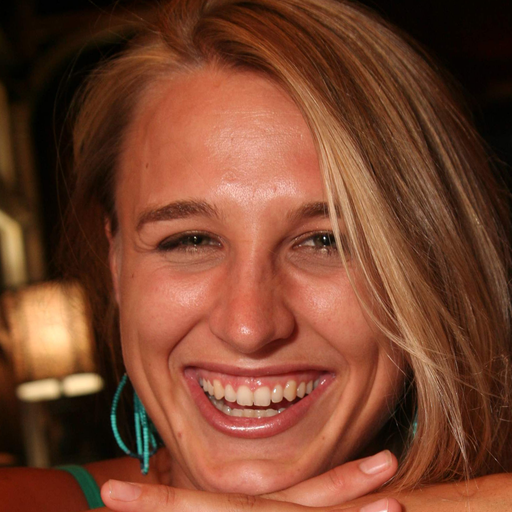

In [ ]:
img1 = Image.open(r"C:\Users\User\Documents\Works\PAIL\Generative-Test\Data\00001.png")
tensor1 = img_to_tensor(img1)
img1

In [ ]:
# Model Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 6, 3), # 3x512x512 -> 6x510x510
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 6x510x510 -> 6x255x255
            nn.Conv2d(6, 16, 3), # 6x255x255 -> 16x253x253
            nn.ReLU(),
            nn.MaxPool2d(2,2,padding=1), # 16x253x253 -> 16x127x127
            nn.Conv2d(16, 32, 3), # 16x127x127 -> 32x125x125
            nn.ReLU(),
            nn.MaxPool2d(2,2,padding=1), # 32x125x125 -> 32x63x63    
            nn.Conv2d(32, 64, 3, padding=1), # 32x63x63 -> 64x61x61 
            nn.ReLU(),
            nn.MaxPool2d(2,2,padding=1), # 64x32x32-> 64x32x32
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64,32,3,stride=4),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 4, stride=2),  
            nn.ReLU(),
            nn.ConvTranspose2d(16, 8, 5, stride=2), 
            nn.ReLU(),
            nn.ConvTranspose2d(8,3, 6, stride=1),
            nn.Sigmoid()
        )
    def forward(self, x, y):
        tensor1 = self.decoder((self.encoder(x) + self.encoder(y))/2)
        img1 = tensor_to_img(tensor1)
        img2 = center_crop(img1)
        tensor2 = img_to_tensor(img2)
        return tensor2

In [ ]:
x = torch.Tensor(64,32,32)
x.shape

torch.Size([64, 32, 32])

In [ ]:
model = Generator()
result = model(tensor1,tensor2)
result.shape

torch.Size([3, 512, 512])

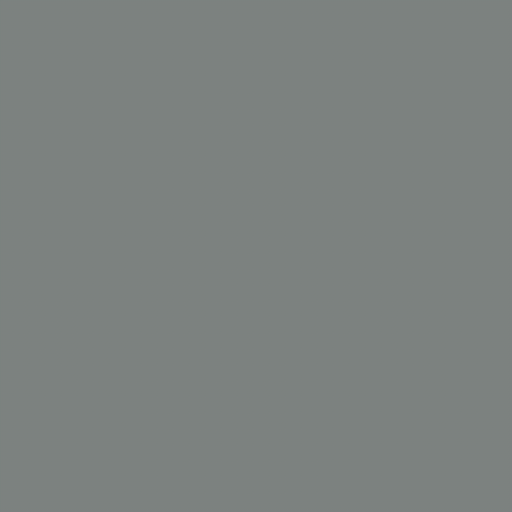

In [ ]:
img = tensor_to_img(result)
img